In [45]:
#Author : Mohamed Hafidi
def sort_dict(dic):
    '''
     Sorts a dictionary based on its keys in ascending order.
    
    Args:
        dic (dict): A dictionary to be sorted.
    
    Returns:
        dict: A new dictionary with the same key-value pairs as the original dictionary, sorted by keys in ascending order.
    '''
    # Get the keys of the dictionary as a list
    myKeys = list(dic.keys())
    
    # Sort the list of keys
    myKeys.sort()
    
    # Create a new dictionary with sorted keys
    sorted_dict = {i: dic[i] for i in myKeys}
    return sorted_dict

In [46]:
import numpy as np
def conditionalBrownianBridge(t,dic):
    '''
    Generates a conditional Brownian bridge at a given time point 't' based on a dictionary of values.
    
     Args:
         t (float): The target time point for generating the bridge.
         dic (dict): A dictionary containing key-value pairs representing time points and corresponding values.
    
     returns:
         dict: A sorted dictionary with the original values and the newly generated value at the target time point.
    '''
    nt = t
    list_dic = list(dic)
    
    # Find the nearest time point 'u' in the dictionary to the target time 't'
    u = min(list_dic, key=lambda k: abs(k-t))
    
    # If 'u' is the first or last time point, adjust 'u' until it is within the range
    if (u==1 or u>=nt):
        while(u>=nt):
            u=list_dic[list_dic.index(u)-1]
            
    # Get the next time point 't'
    t = list_dic[list_dic.index(u) + 1]
    
    # Calculate the midpoint 's'
    s = (t+u)/2
    
    # Get the values at 'u' and 't'
    x = dic[u]
    y = dic[t]
    
    # Generate a random value for the target time point 'nt' using a normal distribution
    dic[nt] = np.random.normal(((t-s)*x+(s-u)*y)/(t-u),((s-u)*(t-s))/(t-u))
    return sort_dict(dic)

# this is a test for "conditionalBrownianBridge" function
dictionary = {
            0:0,
            1:np.random.normal(0,1)
}


#np.random.seed(3245)
for i in range(1000):
    u = np.random.uniform(0,1)
    dictionary = conditionalBrownianBridge(u,dictionary)

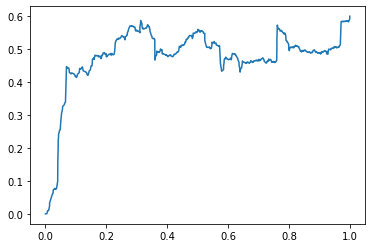

In [47]:
import matplotlib.pyplot as plt
x = list(dictionary.keys())
y = list(dictionary.values())
plt.plot(x,y)

In [48]:
def trapezoidal(array):
    '''
    Calculates the numerical integral of an array using the trapezoidal rule.
    
    Args:
        array (list): A list of values representing the function to be integrated.
    
    Returns:
        float: The numerical integral of the array using the trapezoidal rule.
    '''
    n = len(array)
    a = 0
    b = 1
    h = (b-a)/n
    sumval = 0
    for i in range(1,n):
        sumval = sumval+2*array[i]
    sumval = h*(sumval+array[0]+array[-1])/2
    return sumval

def trapezoidal_inequivalent(x, y):
    n = len(x) - 1  # Number of subintervals
    integral = 0.0  # Initialize the integral

    # Iterate over the subintervals
    for i in range(n):
        h = x[i+1] - x[i]  # Width of the current subinterval
        area = (y[i] + y[i+1]) * (h / 2.0)  # Area of the trapezoid
        integral += area  # Add the area to the integral

    return integral

print(trapezoidal_inequivalent(list(dictionary.keys()),list(dictionary.values())))
print(trapezoidal(list(dictionary.values())))

0.4747066132715092
0.4752516583487223


In [49]:
#np.random.seed(3245)
def montecarlo(x, y, a, b):
    
    n = len(x)  # Number of samples
    integral_sum = 0.0

    for i in range(n):
        if x[i] >= a and x[i] <= b:  # Only consider samples within the integration bounds
            integral_sum += y[i]

    average = integral_sum / n
    integral = (b - a) * average
    return integral

dictionar = {
        0:0,
        1:np.random.normal(0,1)
    }
for i in range(1000):
        x = np.random.uniform(0,1)
        dictionar=conditionalBrownianBridge(x,dictionar)

        
Mt = montecarlo(list(dictionar.keys()),list(dictionar.values()),0,1)
print("monteCarlo result = "+str(Mt))
Tr = trapezoidal(list(dictionar.values()))
print("Trapeze result = "+str(Tr))
print(trapezoidal_inequivalent(list(dictionar.keys()),list(dictionar.values())))

monteCarlo result = -0.35379190572493463
Trapeze result = -0.3540419306685562
-0.3486660884593665


In [50]:
def f(x):
    return 4*x**2-3*x+7
y = np.zeros(1000)
x = np.zeros(1000)
dct = {}
for i in range(1000):
        x[i] = np.random.uniform(0,1)
        dct[x[i]] = f(x[i])
sorted_dic = sort_dict(dct)
x = list(sorted_dic.keys())
y = list(sorted_dic.values())

In [51]:
print(montecarlo(x,y,0,1))
print(trapezoidal(y))
print(trapezoidal_inequivalent(x,y))

6.821799842536426
6.822296273731921
6.821178627409675
